# Bài toán: Dự đoán khả năng sống sót của hành khách trên tàu titanic
MSSV và Họ tên của các thành viên trong nhóm:
* 52000376 Phạm Phong Nhã
* 52000827 Biện Ngọc Cang
* 51900836 Lâm Minh Thông


#Khai báo thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Nhập dữ liệu

In [2]:
#Nhập dữ liệu
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Phân tích thống kê dữ liệu

In [4]:
# Hiển thị thông tin tổng quan
print('DATA INFO:')
df.info()
# Mô tả thống kê
print("DESCRIBE DATA:")
df.describe()

DATA INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
DESCRIBE DATA:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Kiểm tra dữ liệu còn thiếu
print('NULL VARIABLES:')
print(df.isnull().sum())

NULL VARIABLES:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Đếm số lượng mẫu trong một số lớp

In [6]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Vẽ biểu đồ để hiểu dữ liệu

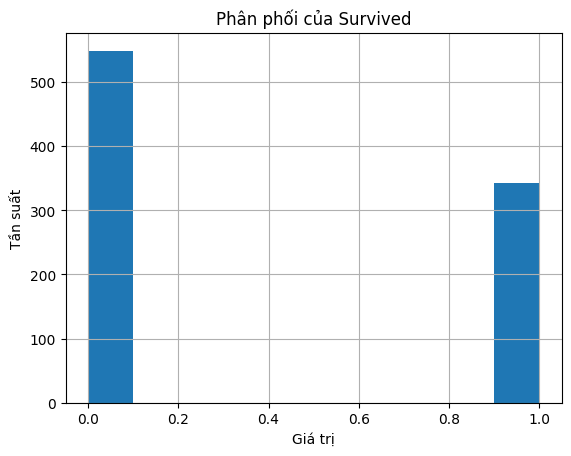

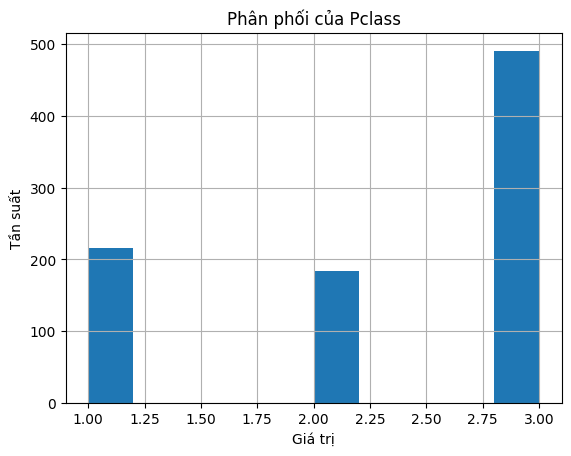

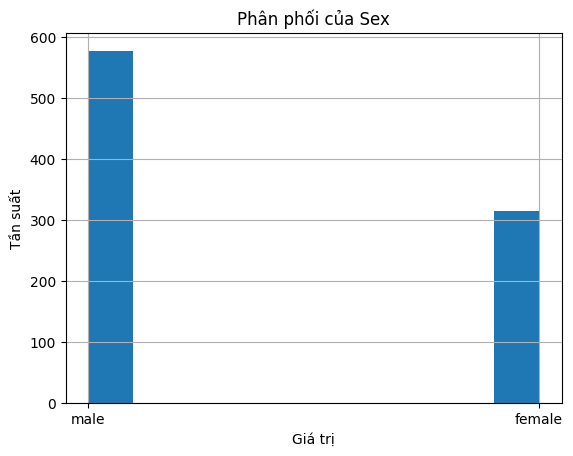

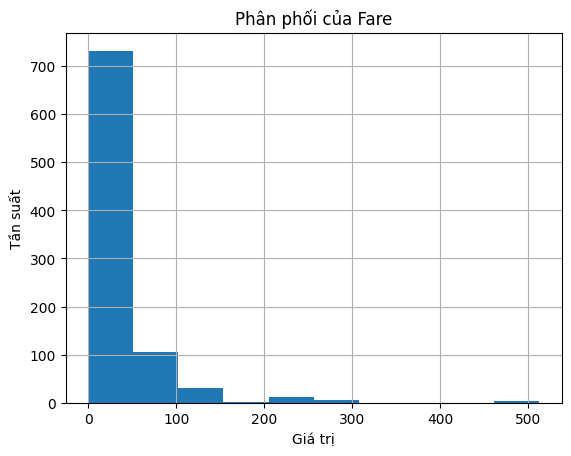

In [10]:
# Vẽ biểu đồ histogram để biểu thị tần xuất xuất hiện của các giá trị
#Survived
df['Survived'].hist()
plt.title('Phân phối của Survived')
plt.xlabel('Giá trị')
plt.ylabel('Tần suất')
plt.show()
#Pclass
df['Pclass'].hist()
plt.title('Phân phối của Pclass')
plt.xlabel('Giá trị')
plt.ylabel('Tần suất')
plt.show()
#Sex
df['Sex'].hist()
plt.title('Phân phối của Sex')
plt.xlabel('Giá trị')
plt.ylabel('Tần suất')
plt.show()
#Fare
df['Fare'].hist()
plt.title('Phân phối của Fare')
plt.xlabel('Giá trị')
plt.ylabel('Tần suất')
plt.show()

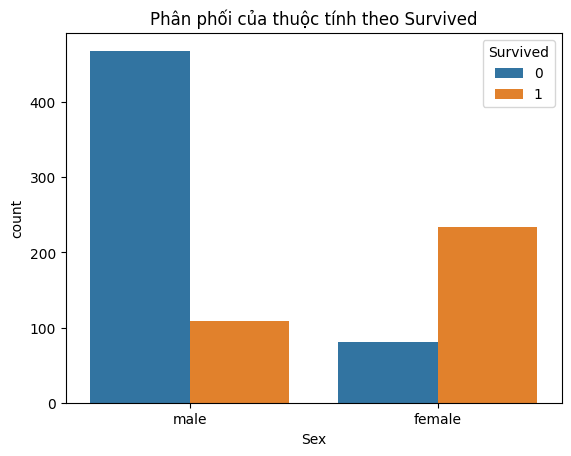

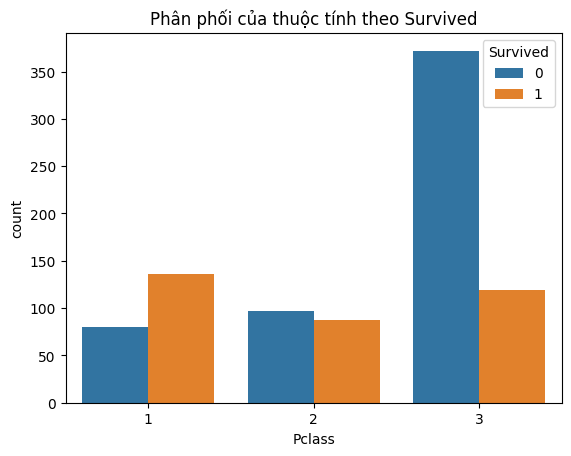

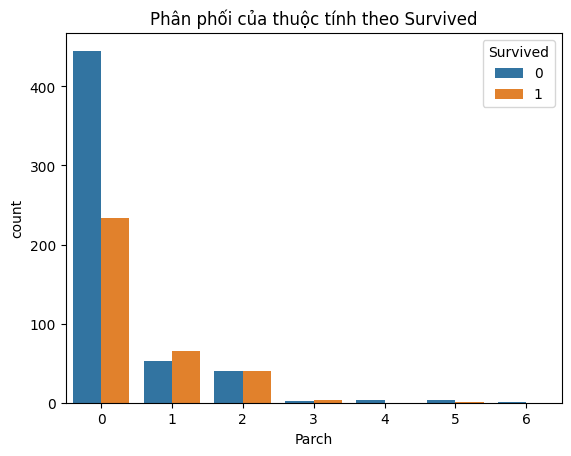

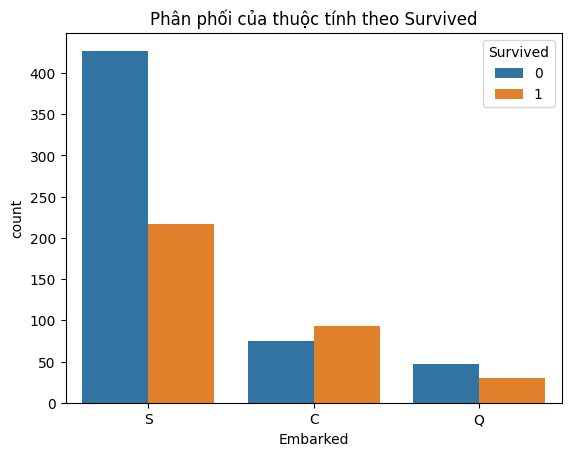

In [11]:
#Xem phân phối của một số thuộc tính theo kết quả
#Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Phân phối của thuộc tính theo Survived')
plt.show()
#Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Phân phối của thuộc tính theo Survived')
plt.show()
#Parch
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title('Phân phối của thuộc tính theo Survived')
plt.show()
#Embarked
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Phân phối của thuộc tính theo Survived')
plt.show()

<ipython-input-12-67cb9ec0b768>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


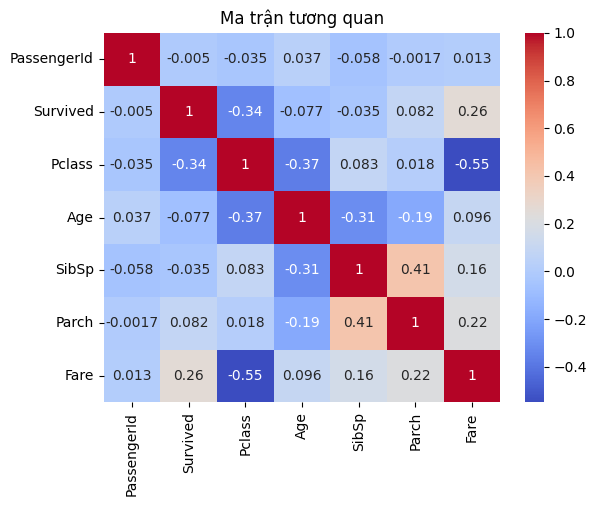

In [12]:
#Tạo ma trận tương quan giữa các lớp với nhau
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan')
plt.show()

# Tiền xử lý dữ liệu

In [13]:
#Tính tuổi trung bình
avg_age = df['Age'].mean()
#Điền tuổi trung bình vào những chỗ bị thiếu
df['Age'].fillna(avg_age,inplace=True)

In [14]:
#Kiểm tra dữ liệu sau khi thêm tuổi còn thiếu
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [15]:
#Bỏ features không cần thiết
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
print(df.shape)
df.head()

(891, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
# Sử dụng One-Hot Encoding cho các feature phân loại
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

print(df)

     Survived  Pclass        Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0           0       3  22.000000      1      0   7.2500           0         1   
1           1       1  38.000000      1      0  71.2833           1         0   
2           1       3  26.000000      0      0   7.9250           1         0   
3           1       1  35.000000      1      0  53.1000           1         0   
4           0       3  35.000000      0      0   8.0500           0         1   
..        ...     ...        ...    ...    ...      ...         ...       ...   
886         0       2  27.000000      0      0  13.0000           0         1   
887         1       1  19.000000      0      0  30.0000           1         0   
888         0       3  29.699118      1      2  23.4500           1         0   
889         1       1  26.000000      0      0  30.0000           0         1   
890         0       3  32.000000      0      0   7.7500           0         1   

     Embarked_C  Embarked_Q

In [17]:
# Chuyển đổi dữ liệu từ không phải int sang dạng int
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
col_names = list(df.columns)

for i in range(len(col_names)):
   if not ( isinstance(df.dtypes[i], int)):
    df[col_names[i]]=LE.fit_transform(df[col_names[i]])
print(df)

     Survived  Pclass  Age  SibSp  Parch  Fare  Sex_female  Sex_male  \
0           0       2   28      1      0    18           0         1   
1           1       0   52      1      0   207           1         0   
2           1       2   34      0      0    41           1         0   
3           1       0   48      1      0   189           1         0   
4           0       2   48      0      0    43           0         1   
..        ...     ...  ...    ...    ...   ...         ...       ...   
886         0       1   35      0      0    85           0         1   
887         1       0   24      0      0   153           1         0   
888         0       2   39      1      2   131           1         0   
889         1       0   34      0      0   153           0         1   
890         0       2   43      0      0    30           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
0             0           0           1  
1             1           0           0  
2        

In [18]:
# Chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df[['Age', 'Fare']] = sc.fit_transform(df[['Age', 'Fare']])

In [19]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,2,0.318182,1,0,0.072874,0,1,0,0,1
1,1,0,0.590909,1,0,0.838057,1,0,1,0,0
2,1,2,0.386364,0,0,0.165992,1,0,0,0,1
3,1,0,0.545455,1,0,0.765182,1,0,0,0,1
4,0,2,0.545455,0,0,0.174089,0,1,0,0,1


In [20]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']
print(X)
print(y)

     Pclass       Age  SibSp  Parch      Fare  Sex_female  Sex_male  \
0         2  0.318182      1      0  0.072874           0         1   
1         0  0.590909      1      0  0.838057           1         0   
2         2  0.386364      0      0  0.165992           1         0   
3         0  0.545455      1      0  0.765182           1         0   
4         2  0.545455      0      0  0.174089           0         1   
..      ...       ...    ...    ...       ...         ...       ...   
886       1  0.397727      0      0  0.344130           0         1   
887       0  0.272727      0      0  0.619433           1         0   
888       2  0.443182      1      2  0.530364           1         0   
889       0  0.386364      0      0  0.619433           0         1   
890       2  0.488636      0      0  0.121457           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
0             0           0           1  
1             1           0           0  
2             0      

#Huấn luyện các mô hình

In [21]:
# Chia tập dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Naive Bayes

In [22]:
#Naive Bayes

# Khởi tạo model
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
y_pred_NB = model_NB.predict(X_test)

In [23]:
# Tính độ chính xác
accuracy_NB = accuracy_score(y_test, y_pred_NB)
print("Naive Bayes Accuracy: %.2f%%" % (accuracy_NB * 100.0))
# model evaluation
print(classification_report(y_test,y_pred_NB))

Naive Bayes Accuracy: 77.09%
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       105
           1       0.70      0.77      0.74        74

    accuracy                           0.77       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.77      0.77       179



## Linear Regression

In [24]:
#Linear Regression

# Khởi tạo model
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
y_pred_LR = (model_LR.predict(X_test) > 0.5).astype(int)

In [25]:
# Tính độ chính xác
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print("Linear Regression Accuracy: %.2f%%" % (accuracy_LR * 100.0))
# model evaluation
print(classification_report(y_test,y_pred_LR))

Linear Regression Accuracy: 79.33%
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



## Decision Tree

In [26]:
# Khởi tạo model
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
y_pred_DT = model_DT.predict(X_test)

In [27]:
# Tính độ chính xác
accuracy_DT = accuracy_score(y_test, y_pred_DT)
print("Decision Tree Accuracy: %.2f%%" % (accuracy_DT * 100.0))
# model evaluation ( đánh giá model)
print(classification_report(y_test,y_pred_DT))

Decision Tree Accuracy: 77.65%
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       105
           1       0.73      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



## K-NN

In [28]:
# Khởi tạo model với số neighbor là 15
model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(X_train, y_train)

y_pred_KNN = model_KNN.predict(X_test)

In [29]:
# Tính độ chính xác
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print("K Nearest Neighbors Accuracy: %.2f%%" % (accuracy_DT * 100.0))
# model evaluation ( đánh giá model)
print(classification_report(y_test,y_pred_KNN))

K Nearest Neighbors Accuracy: 77.65%
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



## SVM

In [30]:
# Khởi tạo model
model_SVM = svm.SVC(kernel='sigmoid', C=1)  # Chọn kernel sigmoid và tham số C=1
model_SVM.fit(X_train, y_train)
y_pred_SVM = model_SVM.predict(X_test)

In [31]:
# Tính độ chính xác
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
print("Support Vector Machines Accurary: %.2f%%" % (accuracy_SVM * 100.0))
# model evaluation ( đánh giá model)
print(classification_report(y_test,y_pred_SVM))

Support Vector Machines Accurary: 59.78%
              precision    recall  f1-score   support

           0       0.65      0.68      0.66       105
           1       0.51      0.49      0.50        74

    accuracy                           0.60       179
   macro avg       0.58      0.58      0.58       179
weighted avg       0.59      0.60      0.60       179



#Giải quyết bài toán bằng Esemble Learning

## Random Forest

In [32]:
#Random Forest

# Khởi tạo model
model_RF = RandomForestClassifier(n_estimators=100, random_state=42)
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)

In [33]:
# Tính độ chính xác
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Random Forest Accurary: %.2f%%" % (accuracy_RF * 100.0))
# model evaluation
print(classification_report(y_test,y_pred_RF))

Random Forest Accurary: 81.56%
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



## AdaBoost (Adaptive Boosting)

In [34]:
#AdaBoost (Adaptive Boosting)

base_estimator = DecisionTreeClassifier(max_depth=1)
model_AB = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
# Train model với dữ liệu huấn luyện
model_AB.fit(X_train, y_train)
y_pred_AB = model_AB.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [35]:
# Tính độ chính xác
accuracy_AB = accuracy_score(y_test, y_pred_AB)
print("AdaBoost Accurary: %.2f%%" % (accuracy_AB * 100.0))
# model evaluation
print(classification_report(y_test,y_pred_AB))

AdaBoost Accurary: 80.45%
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       105
           1       0.76      0.77      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



## Gradient Boosting

In [36]:
#Gradient Boosting

# Khởi tạo model
model_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_GB.fit(X_train, y_train)

y_pred_GB = model_GB.predict(X_test)

In [37]:
# Tính độ chính xác
accuracy_GB = accuracy_score(y_test, y_pred_GB)
print("Gradient Boosting Accurary: %.2f%%" % (accuracy_GB * 100.0))
# model evaluation ( đánh giá model)
print(classification_report(y_test,y_pred_GB))

Gradient Boosting Accurary: 80.45%
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# Feed Forward Neural Network(FFNN)

In [38]:
# Chuẩn hóa dữ liệu cho phù hợp với RNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_rnn = scaler.fit_transform(X_train)
X_test_rnn = scaler.transform(X_test)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Xây dựng mô hình
model_ffnn = Sequential()
model_ffnn.add(Dense(64, activation='relu'))
model_ffnn.add(Dense(32, activation='relu'))
model_ffnn.add(Dense(1, activation='sigmoid'))  # Sử dụng 'sigmoid' vì đây là bài toán phân loại nhị phân

# Compile và huấn luyện
model_ffnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ffnn.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/15
23/23 [==============================] - 1s 14ms/step - loss: 0.6172 - accuracy: 0.6629 - val_loss: 0.5703 - val_accuracy: 0.6760
Epoch 2/15
23/23 [==============================] - 0s 4ms/step - loss: 0.5341 - accuracy: 0.7584 - val_loss: 0.5062 - val_accuracy: 0.7877
Epoch 3/15
23/23 [==============================] - 0s 4ms/step - loss: 0.4877 - accuracy: 0.8006 - val_loss: 0.4746 - val_accuracy: 0.7933
Epoch 4/15
23/23 [==============================] - 0s 4ms/step - loss: 0.4714 - accuracy: 0.8006 - val_loss: 0.4615 - val_accuracy: 0.7877
Epoch 5/15
23/23 [==============================] - 0s 4ms/step - loss: 0.4583 - accuracy: 0.8020 - val_loss: 0.4530 - val_accuracy: 0.7989
Epoch 6/15
23/23 [==============================] - 0s 5ms/step - loss: 0.4516 - accuracy: 0.8020 - val_loss: 0.4461 - val_accuracy: 0.7877
Epoch 7/15
23/23 [==============================] - 0s 4ms/step - loss: 0.4478 - accuracy: 0.8020 - val_loss: 0.4486 - val_accuracy: 0.7765
Epoch 8/15
23/23 [=

In [40]:
model_ffnn.build()
model_ffnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
# Đánh giá mô hình trên tập kiểm tra và in ra kết quả
loss, accuracy = model_ffnn.evaluate(X_test, y_test)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')

6/6 [==============================] - 0s 3ms/step - loss: 0.4234 - accuracy: 0.7989
Accuracy on test set: 79.89%


# Reccurent Neural Network(RNN)



In [42]:
from tensorflow.keras.layers import LSTM, Dropout


# Đưa dữ liệu vào dạng chuỗi với timestep = 1
X_train_rnn = X_train_rnn.reshape(X_train_rnn.shape[0], 1, X_train_rnn.shape[1])
X_test_rnn = X_test_rnn.reshape(X_test_rnn.shape[0], 1, X_test_rnn.shape[1])

# Xây dựng mô hình RNN
model_rnn = Sequential()
model_rnn.add(LSTM(64, input_shape=(1, X_train_rnn.shape[2])))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(32, activation='relu'))
model_rnn.add(Dense(1, activation='sigmoid'))

# Compile và huấn luyện
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.fit(X_train_rnn, y_train, epochs=20, validation_data=(X_test_rnn, y_test))

Epoch 1/20
23/23 [==============================] - 4s 30ms/step - loss: 0.6785 - accuracy: 0.6166 - val_loss: 0.6339 - val_accuracy: 0.7709
Epoch 2/20
23/23 [==============================] - 0s 6ms/step - loss: 0.6017 - accuracy: 0.7865 - val_loss: 0.5541 - val_accuracy: 0.7765
Epoch 3/20
23/23 [==============================] - 0s 6ms/step - loss: 0.5237 - accuracy: 0.7837 - val_loss: 0.4813 - val_accuracy: 0.7765
Epoch 4/20
23/23 [==============================] - 0s 6ms/step - loss: 0.4741 - accuracy: 0.7893 - val_loss: 0.4442 - val_accuracy: 0.7877
Epoch 5/20
23/23 [==============================] - 0s 5ms/step - loss: 0.4508 - accuracy: 0.7963 - val_loss: 0.4298 - val_accuracy: 0.7877
Epoch 6/20
23/23 [==============================] - 0s 6ms/step - loss: 0.4424 - accuracy: 0.8076 - val_loss: 0.4243 - val_accuracy: 0.7933
Epoch 7/20
23/23 [==============================] - 0s 6ms/step - loss: 0.4351 - accuracy: 0.8076 - val_loss: 0.4199 - val_accuracy: 0.7989
Epoch 8/20
23/23 [=

In [43]:
loss, accuracy = model_rnn.evaluate(X_test_rnn, y_test)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')

6/6 [==============================] - 0s 3ms/step - loss: 0.4246 - accuracy: 0.8156
Accuracy on test set: 81.56%


# Áp dụng Early stopping vào các mô hình để tránh overfitting

In [44]:
# hàm số đánh giá độ chính xác
def accuracy(y_true, y_preds):
    return accuracy_score(y_true, y_preds)

# tạo class thực hiện early stopping
class early_stopping():
    def __init__(self, accuracy, eval_set, early_stopping_rounds=20):
        self.accuracy = accuracy
        self.x_val = eval_set[0]
        self.y_val = eval_set[1]
        self.best_perf = 0.
        self.counter = 0
        self.early_stopping_rounds = early_stopping_rounds

    def __call__(self, i, model):
        # dự đoán bằng eval dataset
        preds = model.predict(self.x_val)
        # tính độ chính xác
        acc = self.accuracy(self.y_val, preds)
        # so sánh với độ chính xác tốt nhất
        if acc > self.best_perf:
            self.best_perf = acc
            self.counter = 0
        else:
            self.counter += 1
        # nếu như counter > ngưỡng thì dừng việc học
        return self.counter > self.early_stopping_rounds


## Áp dụng cho các mô hình học máy truyền thống

In [45]:
#Naive Bayes

# Khởi tạo model
model_NB = GaussianNB()

# Thực hiện train theo batch và áp dụng early stopping
callback = early_stopping(accuracy, [X_test, y_test], early_stopping_rounds=13)

for i in range(0,len(X_train),32):
  model_NB.fit(X_train[i:i+32], y_train[i:i+32])

  if callback(i , model_NB):
    print(f"Early stopping at iteration {i}")
    print(f"Length train dataset {len(X_train)}")
    break

# Dự đoán kết quả với dữ liệu test
y_pred_NB = model_NB.predict(X_test)
# Tính độ chính xác
accuracy_NB = accuracy_score(y_test, y_pred_NB)
print("Naive Bayes Accurary: %.2f%%" % (accuracy_NB * 100.0))
# model evaluation ( đánh giá model)
print(classification_report(y_test,y_pred_NB))

Early stopping at iteration 704
Length train dataset 712
Naive Bayes Accurary: 74.30%
              precision    recall  f1-score   support

           0       0.72      0.91      0.81       105
           1       0.80      0.50      0.62        74

    accuracy                           0.74       179
   macro avg       0.76      0.71      0.71       179
weighted avg       0.76      0.74      0.73       179



In [46]:
#Linear Regression

# Khởi tạo model
model_LR = LinearRegression()

# Thực hiện train theo batch và áp dụng early stopping
callback = early_stopping(accuracy, [X_test, y_test], early_stopping_rounds=10)

for i in range(0,len(X_train),32):
  model_LR.fit(X_train[i:i+32], y_train[i:i+32])

  if callback(i , model_NB):
    print(f"Early stopping at iteration {i}")
    print(f"Length train dataset {len(X_train)}")
    break

# Dự đoán kết quả với dữ liệu test
y_pred_LR = model_LR.predict(X_test)
# Đánh giá mô hình bằng Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_LR)
print(f"Linear Regression Mean Squared Error: {mse}")

Early stopping at iteration 352
Length train dataset 712
Linear Regression Mean Squared Error: 0.3368350128878913


In [47]:
#Decision Tree
# Khởi tạo model
model_DT = DecisionTreeClassifier()

# Thực hiện train theo batch và áp dụng early stopping
callback = early_stopping(accuracy, [X_test, y_test], early_stopping_rounds=14)

for i in range(0,len(X_train),32):
  model_DT.fit(X_train[i:i+32], y_train[i:i+32])
  if callback(i , model_NB):
    print(f"Early stopping at iteration {i}")
    print(f"Length train dataset {len(X_train)}")
    break

# Dự đoán kết quả với dữ liệu test
y_pred_DT = model_DT.predict(X_test)
# Tính độ chính xác
accuracy_DT = accuracy_score(y_test, y_pred_DT)
print("Decision Tree Accurary: %.2f%%" % (accuracy_DT * 100.0))
# model evaluation ( đánh giá model)
print(classification_report(y_test,y_pred_DT))

Early stopping at iteration 480
Length train dataset 712
Decision Tree Accurary: 77.65%
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       105
           1       0.77      0.66      0.71        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.78      0.77       179



In [48]:
#K Nearest Neighbors

# Khởi tạo model với số neighbor là 15
model_KNN = KNeighborsClassifier(n_neighbors=15)

# Thực hiện train theo batch và áp dụng early stopping
callback = early_stopping(accuracy, [X_test, y_test], early_stopping_rounds=10)

for i in range(0,len(X_train),32):
  model_KNN.fit(X_train[i:i+32], y_train[i:i+32])
  if callback(i , model_NB):
    print(f"Early stopping at iteration {i}")
    print(f"Length train dataset {len(X_train)}")
    break

# Dự đoán kết quả với dữ liệu test
y_pred_KNN = model_KNN.predict(X_test)
# Tính độ chính xác
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print("K Nearest Neighbors Accurary: %.2f%%" % (accuracy_DT * 100.0))
# model evaluation ( đánh giá model)
print(classification_report(y_test,y_pred_KNN))

Early stopping at iteration 352
Length train dataset 712
K Nearest Neighbors Accurary: 77.65%
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       105
           1       0.72      0.57      0.64        74

    accuracy                           0.73       179
   macro avg       0.73      0.71      0.71       179
weighted avg       0.73      0.73      0.73       179



In [49]:
#Support Vector Machines

# Khởi tạo model
model_SVM = svm.SVC(kernel='sigmoid', C=1)  # Chọn kernel sigmoid và tham số C=1

# Thực hiện train theo batch và áp dụng early stopping
callback = early_stopping(accuracy, [X_test, y_test], early_stopping_rounds=10)

for i in range(0,len(X_train),32):
  model_SVM.fit(X_train[i:i+32], y_train[i:i+32])
  if callback(i , model_NB):
    print(f"Early stopping at iteration {i}")
    print(f"Length train dataset {len(X_train)}")
    break

# Dự đoán kết quả với dữ liệu test
y_pred_SVM = model_SVM.predict(X_test)
# Tính độ chính xác
accuracy_SVM = accuracy_score(y_test, y_pred_KNN)
print("Support Vector Machines Accurary: %.2f%%" % (accuracy_SVM * 100.0))
# model evaluation ( đánh giá model)
print(classification_report(y_test,y_pred_SVM))

Early stopping at iteration 352
Length train dataset 712
Support Vector Machines Accurary: 73.18%
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       105
           1       0.65      0.65      0.65        74

    accuracy                           0.71       179
   macro avg       0.70      0.70      0.70       179
weighted avg       0.71      0.71      0.71       179



## Áp dụng cho các mô hình học máy thuộc ensemble learning

In [50]:
#Random Forest

# Khởi tạo model
model_RF = RandomForestClassifier(n_estimators=100, random_state=42)

# Thực hiện train theo batch và áp dụng early stopping
callback = early_stopping(accuracy, [X_test, y_test], early_stopping_rounds=13)

for i in range(0,len(X_train),32):
  model_RF.fit(X_train[i:i+32], y_train[i:i+32])
  if callback(i , model_NB):
    print(f"Early stopping at iteration {i}")
    print(f"Length train dataset {len(X_train)}")
    break

# Dự đoán kết quả với dữ liệu test
y_pred_RF = model_RF.predict(X_test)
# Tính độ chính xác
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Random Forest Accurary: %.2f%%" % (accuracy_RF * 100.0))
# model evaluation ( đánh giá model)
print(classification_report(y_test,y_pred_RF))

Early stopping at iteration 448
Length train dataset 712
Random Forest Accurary: 72.63%
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       105
           1       0.69      0.62      0.65        74

    accuracy                           0.73       179
   macro avg       0.72      0.71      0.71       179
weighted avg       0.72      0.73      0.72       179



In [51]:
import warnings
warnings.filterwarnings('ignore')

#AdaBoost (Adaptive Boosting)

# Khởi tạo model
# Ở đây, chúng ta sử dụng Decision Tree Classifier làm mô hình cơ bản (base estimator)
base_estimator = DecisionTreeClassifier(max_depth=1)
model_AB = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Thực hiện train theo batch và áp dụng early stopping
callback = early_stopping(accuracy, [X_test, y_test], early_stopping_rounds=15)

for i in range(0,len(X_train),32):
  model_AB.fit(X_train[i:i+32], y_train[i:i+32])
  if callback(i , model_NB):
    print(f"Early stopping at iteration {i}")
    print(f"Length train dataset {len(X_train)}")
    break

# Dự đoán kết quả với dữ liệu test
y_pred_AB = model_AB.predict(X_test)
# Tính độ chính xác
accuracy_AB = accuracy_score(y_test, y_pred_AB)
print("AdaBoost Accurary: %.2f%%" % (accuracy_AB * 100.0))
# model evaluation ( đánh giá model)
print(classification_report(y_test,y_pred_AB))

Early stopping at iteration 512
Length train dataset 712
AdaBoost Accurary: 77.65%
              precision    recall  f1-score   support

           0       0.89      0.70      0.79       105
           1       0.68      0.88      0.76        74

    accuracy                           0.78       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.78      0.78       179



In [52]:
#Gradient Boosting

# Khởi tạo model
model_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Thực hiện train theo batch và áp dụng early stopping
callback = early_stopping(accuracy, [X_test, y_test], early_stopping_rounds=15)

for i in range(0,len(X_train),32):
  model_GB.fit(X_train[i:i+32], y_train[i:i+32])
  if callback(i , model_NB):
    print(f"Early stopping at iteration {i}")
    print(f"Length train dataset {len(X_train)}")
    break

# Dự đoán kết quả với dữ liệu test
y_pred_GB = model_GB.predict(X_test)
# Tính độ chính xác
accuracy_GB = accuracy_score(y_test, y_pred_GB)
print("Gradient Boosting Accurary: %.2f%%" % (accuracy_GB * 100.0))
# model evaluation ( đánh giá model)
print(classification_report(y_test,y_pred_GB))

Early stopping at iteration 512
Length train dataset 712
Gradient Boosting Accurary: 77.65%
              precision    recall  f1-score   support

           0       0.89      0.70      0.79       105
           1       0.68      0.88      0.76        74

    accuracy                           0.78       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.78      0.78       179



## Áp dụng Early stopping vào NN

### FFNN

In [55]:
import tensorflow as tf

# Định dạng Callback
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get("loss") < 0.4:
      print("\nLoss is to low so stop training.")
      self.model.stop_training = True

callback = MyCallback()

In [57]:
# Xây dựng kiến trúc mạng FFNN
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sử dụng 'sigmoid' vì đây là bài toán phân loại nhị phân

# Compile và huấn luyện
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32
          ,validation_data=(X_test, y_test), callbacks = [callback])

Epoch 1/100
23/23 [==============================] - 3s 23ms/step - loss: 0.6096 - accuracy: 0.6503 - val_loss: 0.5619 - val_accuracy: 0.6872
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5305 - accuracy: 0.7514 - val_loss: 0.5040 - val_accuracy: 0.7933
Epoch 3/100
23/23 [==============================] - 0s 8ms/step - loss: 0.4909 - accuracy: 0.8034 - val_loss: 0.4723 - val_accuracy: 0.7821
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4706 - accuracy: 0.7992 - val_loss: 0.4537 - val_accuracy: 0.7877
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4602 - accuracy: 0.7992 - val_loss: 0.4449 - val_accuracy: 0.7933
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4533 - accuracy: 0.7992 - val_loss: 0.4382 - val_accuracy: 0.7821
Epoch 7/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4487 - accuracy: 0.8048 - val_loss: 0.4390 - val_accuracy: 0.7877
Epoch 8/100


In [58]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')

6/6 [==============================] - 0s 3ms/step - loss: 0.4109 - accuracy: 0.8156
Accuracy on test set: 81.56%


### RNN

In [61]:
# Xây dựng lại kiến trúc mạng RNN
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train_rnn.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile và huấn luyện
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Thêm callback vào quá trình huấn luyện
model.fit(X_train_rnn, y_train, epochs=100,
          validation_data=(X_test_rnn, y_test), callbacks = [callback])

Epoch 1/100
23/23 [==============================] - 5s 53ms/step - loss: 0.6601 - accuracy: 0.7022 - val_loss: 0.6252 - val_accuracy: 0.7821
Epoch 2/100
23/23 [==============================] - 0s 8ms/step - loss: 0.5903 - accuracy: 0.7992 - val_loss: 0.5431 - val_accuracy: 0.7877
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 0.5167 - accuracy: 0.8062 - val_loss: 0.4809 - val_accuracy: 0.7821
Epoch 4/100
23/23 [==============================] - 0s 8ms/step - loss: 0.4758 - accuracy: 0.7935 - val_loss: 0.4447 - val_accuracy: 0.7765
Epoch 5/100
23/23 [==============================] - 0s 10ms/step - loss: 0.4512 - accuracy: 0.8020 - val_loss: 0.4280 - val_accuracy: 0.8045
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4360 - accuracy: 0.8104 - val_loss: 0.4200 - val_accuracy: 0.7989
Epoch 7/100
23/23 [==============================] - 0s 8ms/step - loss: 0.4293 - accuracy: 0.8090 - val_loss: 0.4133 - val_accuracy: 0.7989
Epoch 8/100

In [62]:
loss, accuracy = model.evaluate(X_test_rnn, y_test)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')

6/6 [==============================] - 0s 8ms/step - loss: 0.4259 - accuracy: 0.8212
Accuracy on test set: 82.12%


# Cải thiện độ chính xác

Các trường hợp sai có thể là do các nguyên nhân:
* Mô hình chưa đủ phức tạp để học hết tất cả các quy luật trong dữ liệu.
* Các tham số chưa được tối ưu.
* Xử lý dữ liệu chưa tốt.

Các giải pháp đề ra:
* Sử dụng Cross-validation
* Tinh chỉnh lại tham số
* Sử dụng các mô hình học máy khác
* Xem xét lại việc xử lý dữ liệu
* Tăng số layer cho mô hình NN


## Sử dụng mô hình khác: Logistic Regression

Accuracy of Logistic Regression: 0.7932960893854749
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



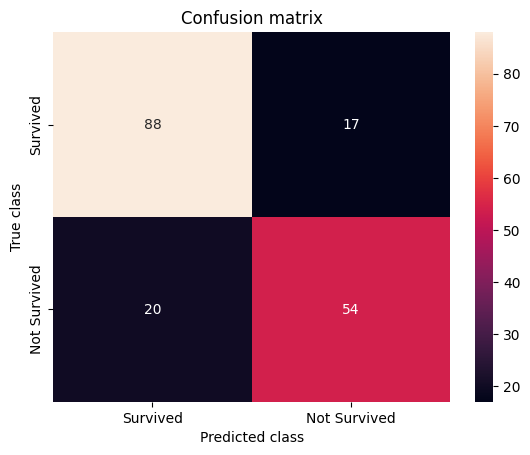

In [63]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy of Logistic Regression:", metrics.accuracy_score(y_test, y_pred))

print("Classification report:\n", classification_report(y_test, y_pred))

# Vẽ confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
categories  = ['Survived', 'Not Survived']
sns.heatmap(cf_matrix, xticklabels=categories, yticklabels=categories, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Nhận xét: Khi sử dụng mô hình Logistic Regression kết quả accuracy là 79.33%. Kết quả này khi với các mô hình trên, nó cao hơn so với Naive Bayes, Decision Tree, K Nearest Neighbors.

## Tinh tỉnh lại tham số của mô hình K-NN

In [64]:
# Sử dụng GridSearch
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
# Cho n chạy từ 1 -> 20
param_grid = {'n_neighbors': np.arange(1, 20)}
# Cho cv = 5
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)
# Tìm ra n và score tốt nhất
print("Best params:", knn_gscv.best_params_)
print("Best score:", knn_gscv.best_score_)

best_model = knn_gscv.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Best params: {'n_neighbors': 13}
Best score: 0.8089530188121736
Accuracy: 79.89%


Nhận xét: Sau khi áp dụng GridSearch để tìm ra n tốt nhất thì kết quả là 79.89%. So với mô hình K-NN ban đầu thì độ chính xác đã được cải thiện.

## Tinh tỉnh lại tham số của mô hình SVM



In [65]:
# Danh sách các giá trị C thử nghiệm
C_values = [0.1, 1, 10, 100]

#Tìm giá trị tốt nhất cho C
param_grid = {'C': C_values}
grid_search_SVM = GridSearchCV(svm.SVC(kernel='sigmoid'), param_grid, cv=5, scoring='accuracy')
grid_search_SVM.fit(X_train, y_train)

# Lấy giá trị tốt nhất cho tham số C
best_C_SVM = grid_search_SVM.best_params_['C']
print("C tốt nhất:", best_C_SVM)

C tốt nhất: 0.1


In [66]:
# Huấn luyện mô hình với C tốt nhất
best_model_SVM = svm.SVC(kernel='sigmoid', C=best_C_SVM)
best_model_SVM.fit(X_train, y_train)

y_pred_best_SVM = best_model_SVM.predict(X_test)
accuracy_best_SVM = accuracy_score(y_test, y_pred_best_SVM)

print("Best Support Vector Machines Accuracy: %.2f%%" % (accuracy_best_SVM * 100.0))
print(classification_report(y_test, y_pred_best_SVM))

Best Support Vector Machines Accuracy: 73.74%
              precision    recall  f1-score   support

           0       0.80      0.73      0.77       105
           1       0.66      0.74      0.70        74

    accuracy                           0.74       179
   macro avg       0.73      0.74      0.73       179
weighted avg       0.74      0.74      0.74       179



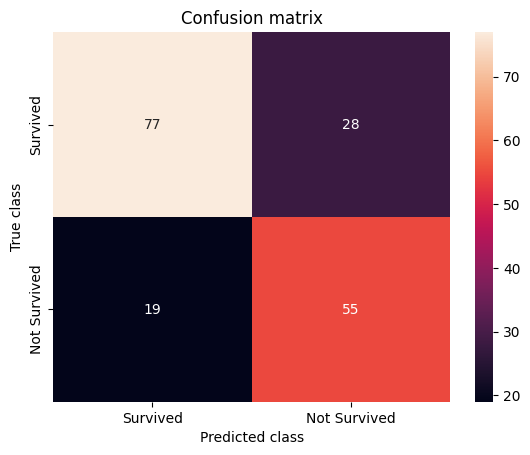

In [67]:
# Vẽ confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_best_SVM)
categories  = ['Survived', 'Not Survived']
sns.heatmap(cf_matrix, xticklabels=categories, yticklabels=categories, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Nhận xét: Sau khi tìm được C tốt nhất cho mô hình SVM thì độ chính xác đã được cải thiện rõ rệt. Từ 59.78% tăng lên 73.74%.

## Sử dụng Cross-validation

In [68]:
#Sử dụng Cross-validation cho mô hình Random Forest
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# Khởi tạo model
model_RF_best = RandomForestClassifier(n_estimators=100, random_state=42)
# Khởi tạo KFold với số fold là 10
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# Thực hiện cross-validation
scores = cross_val_score(model_RF_best, X, y, cv=cv)
# In ra kết quả
print(f'Accuracy scores: {scores}')
print(f'Mean accuracy: {scores.mean()}')

Accuracy scores: [0.84444444 0.82022472 0.76404494 0.7752809  0.82022472 0.82022472
 0.78651685 0.82022472 0.79775281 0.85393258]
Mean accuracy: 0.810287141073658


In [69]:
#huân luyện mô hình với tập dữ liệu train
model_RF_best.fit(X_train, y_train)
# Dự đoán kết quả với dữ liệu test
y_pred_RF_best = model_RF_best.predict(X_test)
# Tính độ chính xác
accuracy_RF_best = accuracy_score(y_test, y_pred_RF_best)
print("Random Forest Accurary: %.2f%%" % (accuracy_RF_best * 100.0))
# model evaluation ( đánh giá model)
print(classification_report(y_test,y_pred_RF_best))

Random Forest Accurary: 81.56%
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



Nhận xét:Sau khi áp dụng Cross-validation vào mô hình Random Forest thì kết quả độ chính xác nhận được vẫn không thay đổi so với mô hình ban đầu.

## Tăng số layer cho các mô hình NN

### FFNN

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Xây dựng mô hình với 3 lớp Dense
model_ffnn = Sequential()
model_ffnn.add(Dense(64, activation='relu'))
model_ffnn.add(Dense(32, activation='relu'))
model_ffnn.add(Dense(16, activation='relu'))  # Thêm một lớp mới với 16 đơn vị ẩn
model_ffnn.add(Dense(1, activation='sigmoid'))

# Compile và huấn luyện
model_ffnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ffnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
23/23 [==============================] - 1s 12ms/step - loss: 0.6115 - accuracy: 0.7233 - val_loss: 0.5543 - val_accuracy: 0.7598
Epoch 2/10
23/23 [==============================] - 0s 5ms/step - loss: 0.5197 - accuracy: 0.7823 - val_loss: 0.4719 - val_accuracy: 0.7709
Epoch 3/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4687 - accuracy: 0.7907 - val_loss: 0.4406 - val_accuracy: 0.7877
Epoch 4/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4548 - accuracy: 0.7907 - val_loss: 0.4345 - val_accuracy: 0.7821
Epoch 5/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4456 - accuracy: 0.8006 - val_loss: 0.4317 - val_accuracy: 0.8045
Epoch 6/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4385 - accuracy: 0.8118 - val_loss: 0.4293 - val_accuracy: 0.7877
Epoch 7/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4371 - accuracy: 0.8076 - val_loss: 0.4231 - val_accuracy: 0.8101
Epoch 8/10
23/23 [=

In [71]:
model_ffnn.build()
model_ffnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                704       
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3329 (13.00 KB)
Trainable params: 3329 (13.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
# Đánh giá mô hình trên tập kiểm tra và in ra kết quả
loss, accuracy = model_ffnn.evaluate(X_test, y_test)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')

6/6 [==============================] - 0s 4ms/step - loss: 0.4235 - accuracy: 0.7989
Accuracy on test set: 79.89%


Sau khi thêm 1 layer mới cho mô hình FFNN thì độ chính xác là 79.89%

### RNN

In [73]:
from tensorflow.keras.layers import LSTM, Dropout

# Xây dựng mô hình RNN với thêm một lớp LSTM và một lớp Dense
model_rnn = Sequential()
model_rnn.add(LSTM(64, input_shape=(1, X_train_rnn.shape[2]), return_sequences=True))
model_rnn.add(Dropout(0.2))
model_rnn.add(LSTM(32))  # Thêm một lớp LSTM mới
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(32, activation='relu'))
model_rnn.add(Dense(1, activation='sigmoid'))

# Compile và huấn luyện
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.fit(X_train_rnn, y_train, epochs=20, validation_data=(X_test_rnn, y_test))


Epoch 1/20
23/23 [==============================] - 6s 48ms/step - loss: 0.6817 - accuracy: 0.7289 - val_loss: 0.6645 - val_accuracy: 0.7709
Epoch 2/20
23/23 [==============================] - 0s 8ms/step - loss: 0.6390 - accuracy: 0.8132 - val_loss: 0.5981 - val_accuracy: 0.7877
Epoch 3/20
23/23 [==============================] - 0s 7ms/step - loss: 0.5506 - accuracy: 0.8006 - val_loss: 0.4924 - val_accuracy: 0.7765
Epoch 4/20
23/23 [==============================] - 0s 8ms/step - loss: 0.4725 - accuracy: 0.7865 - val_loss: 0.4416 - val_accuracy: 0.7821
Epoch 5/20
23/23 [==============================] - 0s 7ms/step - loss: 0.4487 - accuracy: 0.8034 - val_loss: 0.4262 - val_accuracy: 0.7933
Epoch 6/20
23/23 [==============================] - 0s 7ms/step - loss: 0.4324 - accuracy: 0.8146 - val_loss: 0.4216 - val_accuracy: 0.7989
Epoch 7/20
23/23 [==============================] - 0s 8ms/step - loss: 0.4299 - accuracy: 0.8090 - val_loss: 0.4182 - val_accuracy: 0.8101
Epoch 8/20
23/23 [=

In [74]:
loss, accuracy = model_rnn.evaluate(X_test_rnn, y_test)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')

6/6 [==============================] - 0s 4ms/step - loss: 0.4288 - accuracy: 0.8268
Accuracy on test set: 82.68%


Sau khi thêm 1 layer mới cho mô hình RNN thì độ chính xác đã được cải thiện tăng từ 81.01% lên 82.68%